In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Fetch stock data
ticker = "AAPL"  # Example: Apple Inc.
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")


[*********************100%***********************]  1 of 1 completed


In [3]:
# Prepare features and target
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Moving_Avg_5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['Moving_Avg_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=5).std()
stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict the next day's close price

# Drop NaN values
stock_data = stock_data.dropna()

In [4]:
from sklearn.model_selection import train_test_split

# Features and target
X = stock_data[['Close', 'Return', 'Moving_Avg_5', 'Moving_Avg_20', 'Volatility']]
y = stock_data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Evaluate performance

# Measures the average squared difference between actual and predicted values. 
# Larger errors are penalized more heavily due to squaring.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 6.237719411441124


In [7]:
# The square root of the MSE, bringing the metric back to the original scale of the target variable.
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 2.4975426745985994


/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# Indicates how well the model explains the variance in the target variable. Values range from 0 to 1, where:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")



R² Score: 0.9937541527925731


In [9]:
# Measures the average absolute difference between actual and predicted values. 
# Lower values indicate better accuracy.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.896751340769758


In [10]:

# Measures the proportion of variance explained by the model. Similar to r^2, but can be more robust to data noise.
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")

Explained Variance Score: 0.9938198693926386


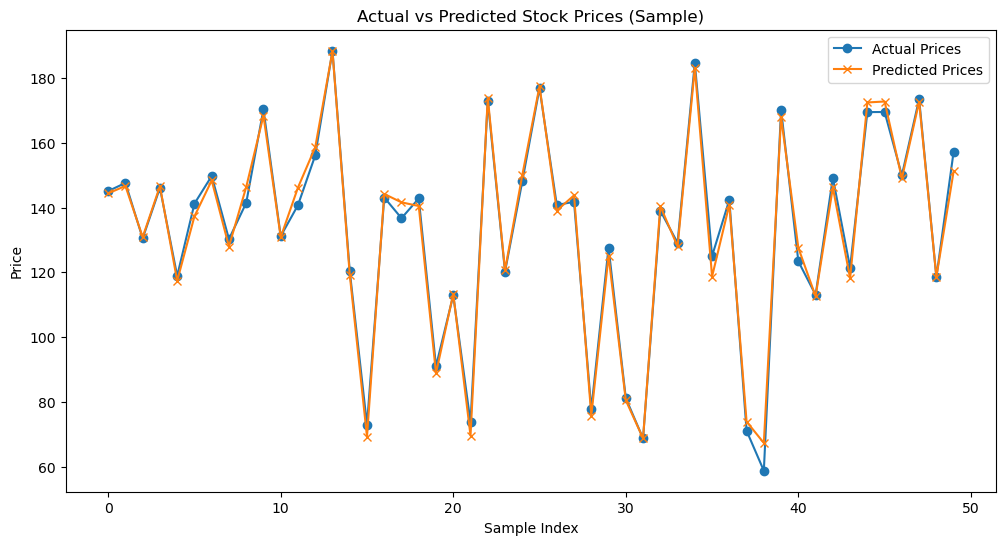

In [12]:
import matplotlib.pyplot as plt

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label="Actual Prices", marker='o')
plt.plot(y_pred[:50], label="Predicted Prices", marker='x')
plt.legend()
plt.title("Actual vs Predicted Stock Prices (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.show()

In [16]:
stock_data

Price,Close,High,Low,Open,Volume,Return,Moving_Avg_5,Moving_Avg_20,Volatility,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-30,78.496582,78.549904,77.255645,77.689491,126743200,-0.001449,77.227045,75.628484,1.507527,75.016121
2020-01-31,75.016121,78.208137,74.720429,77.783989,199588400,-0.044339,76.800467,75.739489,1.807125,74.810127
2020-02-03,74.810127,75.980774,73.249260,73.753387,173788400,-0.002746,76.786411,75.875580,1.825969,77.279877
2020-02-04,77.279877,77.471352,76.014702,76.421883,136616400,0.033014,76.842639,76.106439,1.838428,77.910034
2020-02-05,77.910034,78.712280,77.304108,78.411736,118826800,0.008154,76.702548,76.385891,1.690797,78.821342
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,193.730881,196.119189,192.556641,195.143971,46482500,-0.000770,195.026559,192.543723,1.265647,192.656174
2023-12-22,192.656174,194.457347,192.029240,194.228458,37122800,-0.005547,194.236429,192.724338,1.265642,192.108871


In [13]:
# from sklearn.ensemble import RandomForestClassifier

# # Train Random Forest Classifier
# classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
# classifier.fit(X_train, y_train)

# # Predictions
# y_pred = classifier.predict(X_test)

In [14]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Evaluate performance
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f"Accuracy: {accuracy * 100:.2f}%")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [15]:
# import seaborn as sns

# # Visualization: Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down/No Change', 'Up'], 
#             yticklabels=['Down/No Change', 'Up'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()